In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle, importlib
import argparse
import subprocess
import sys
import lime
import lime.lime_tabular
import shap
%matplotlib inline

/data1/wuguojia/software/miniconda/envs/shaplime/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/data1/wuguojia/software/miniconda/envs/shaplime/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for 

In [3]:
#LIME
command = ["python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
           "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
           "--index", "0",
           "--predictor","mhcflurry",
           "--xai","LIME",
           "--mode","presentation_score",
           "--trainf_path","/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.csv",
           "--dest",'/data1/wuguojia/data/mhc_benchmark/attentionbase/result/']

result = subprocess.run(command,stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("LIME binding affinity done")

LIME binding affinity done


In [3]:
#SHAP
command = ["python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
           "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
           "--index", "0",
           "--predictor","mhcflurry",
           "--xai","SHAP",
           "--mode","presentation_score",
           "--trainf_path","/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.pkl",
           "--dest",'/data1/wuguojia/data/mhc_benchmark/attentionbase/result/']

result = subprocess.run(command,stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("SHAP binding affinity done")

SHAP binding affinity done


Text(0.5, 1.0, 'SHAP MHCflurry Presentation Score')

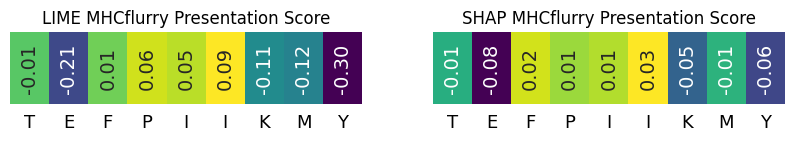

In [4]:
# Plot
#1
fig,ax = plt.subplots(1,2,figsize=(5*2,1.25*0.75))
peptide = 'TEFPIIKMY'
result_path = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result/mhcflurry_ba/'
values = np.load(f'{result_path}LIME_TEFPIIKMY_HLA-A*02:01_mhcflurry_affinity.npy')[1:(1+len(peptide))]
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[0])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("LIME MHCflurry Presentation Score")
#2
values = np.load(f'{result_path}SHAP_TEFPIIKMY_HLA-A*02:01_mhcflurry_affinity.npy')
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[1])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("SHAP MHCflurry Presentation Score")


Text(0.5, 1.0, '02')

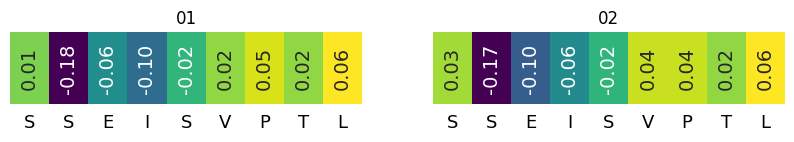

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle, importlib
import argparse
import subprocess
import sys
# Plot
#1
fig,ax = plt.subplots(1,2,figsize=(5*2,1.25*0.75))
peptide = 'SSEISVPTL'
result_path = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result/mhcflurry_ba/'
values = np.load(f'{result_path}LIME_{peptide}_HLA-A*02:01_mhcflurry_affinity.npy')[1:(1+len(peptide))]
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[0])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("01")
#2
result_path2 = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result2/mhcflurry_ba/'
values = np.load(f'{result_path2}LIME_{peptide}_HLA-A*02:01_mhcflurry_affinity.npy')[1:(1+len(peptide))]
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[1])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("02")


In [5]:
import os

peptide = 'AEDAMRLYY'
result_path = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result/mhcflurry_ba/'
file_path = f'{result_path}LIME_{peptide}_HLA-C*05:01_mhcflurry_affinity.npy'
values = np.load(file_path)
values

array([ 4.54069788e-01, -3.35572626e-04, -1.65235980e-01,  2.29058686e-01,
       -3.25555120e-02, -1.76839178e-02, -5.76896226e-02,  1.18416394e-02,
       -1.29699292e-03, -1.68251753e-01,  4.95267037e-01,  2.51920762e-01])